In [1]:
import synthgauge as sg
import pandas as pd

%matplotlib inline

In [2]:
real_data = pd.read_csv('data.csv')
synth_data = pd.read_csv('mst_data.csv')

display(real_data.head())
display(synth_data.head())

,TransAmtDisc,DayOfWeek,Hour,Product,CardType,CardCategory,EmailDomain,Region,DaysSinceLastTrans,isFraud
0,4,1,0,2,2,0,3,2,3,1
1,2,1,0,4,3,1,3,0,2,0
2,4,1,0,2,2,0,3,2,3,1
3,2,1,0,4,3,1,3,0,3,0
4,1,1,0,1,0,0,3,3,3,0


,TransAmtDisc,DayOfWeek,Hour,Product,CardType,CardCategory,EmailDomain,Region,DaysSinceLastTrans,isFraud
0,2,3,21,4,3,1,3,0,3,0
1,3,3,4,1,3,0,7,2,3,0
2,3,3,2,4,3,1,3,0,0,0
3,2,6,1,4,3,1,7,0,0,0
4,4,5,8,4,3,1,9,3,3,0


In [3]:
col_names = list(real_data)

# loop to change each column to category type
for col in col_names:
    real_data[col] = real_data[col].astype('category',copy=False)
    synth_data[col] = synth_data[col].astype('category',copy=False)

In [4]:
E = sg.Evaluator(real_data, synth_data)
E.describe_categorical()

,count,unique,most_frequent,freq
CardCategory_real,82718,2,1,63511
CardCategory_synth,82718,2,1,63521
CardType_real,82718,4,3,54853
CardType_synth,82718,4,3,54852
DayOfWeek_real,82718,7,3,13672
DayOfWeek_synth,82718,7,3,13666
DaysSinceLastTrans_real,82718,4,0,39039
DaysSinceLastTrans_synth,82718,4,0,39039
EmailDomain_real,82718,10,3,38295
EmailDomain_synth,82718,10,3,38315


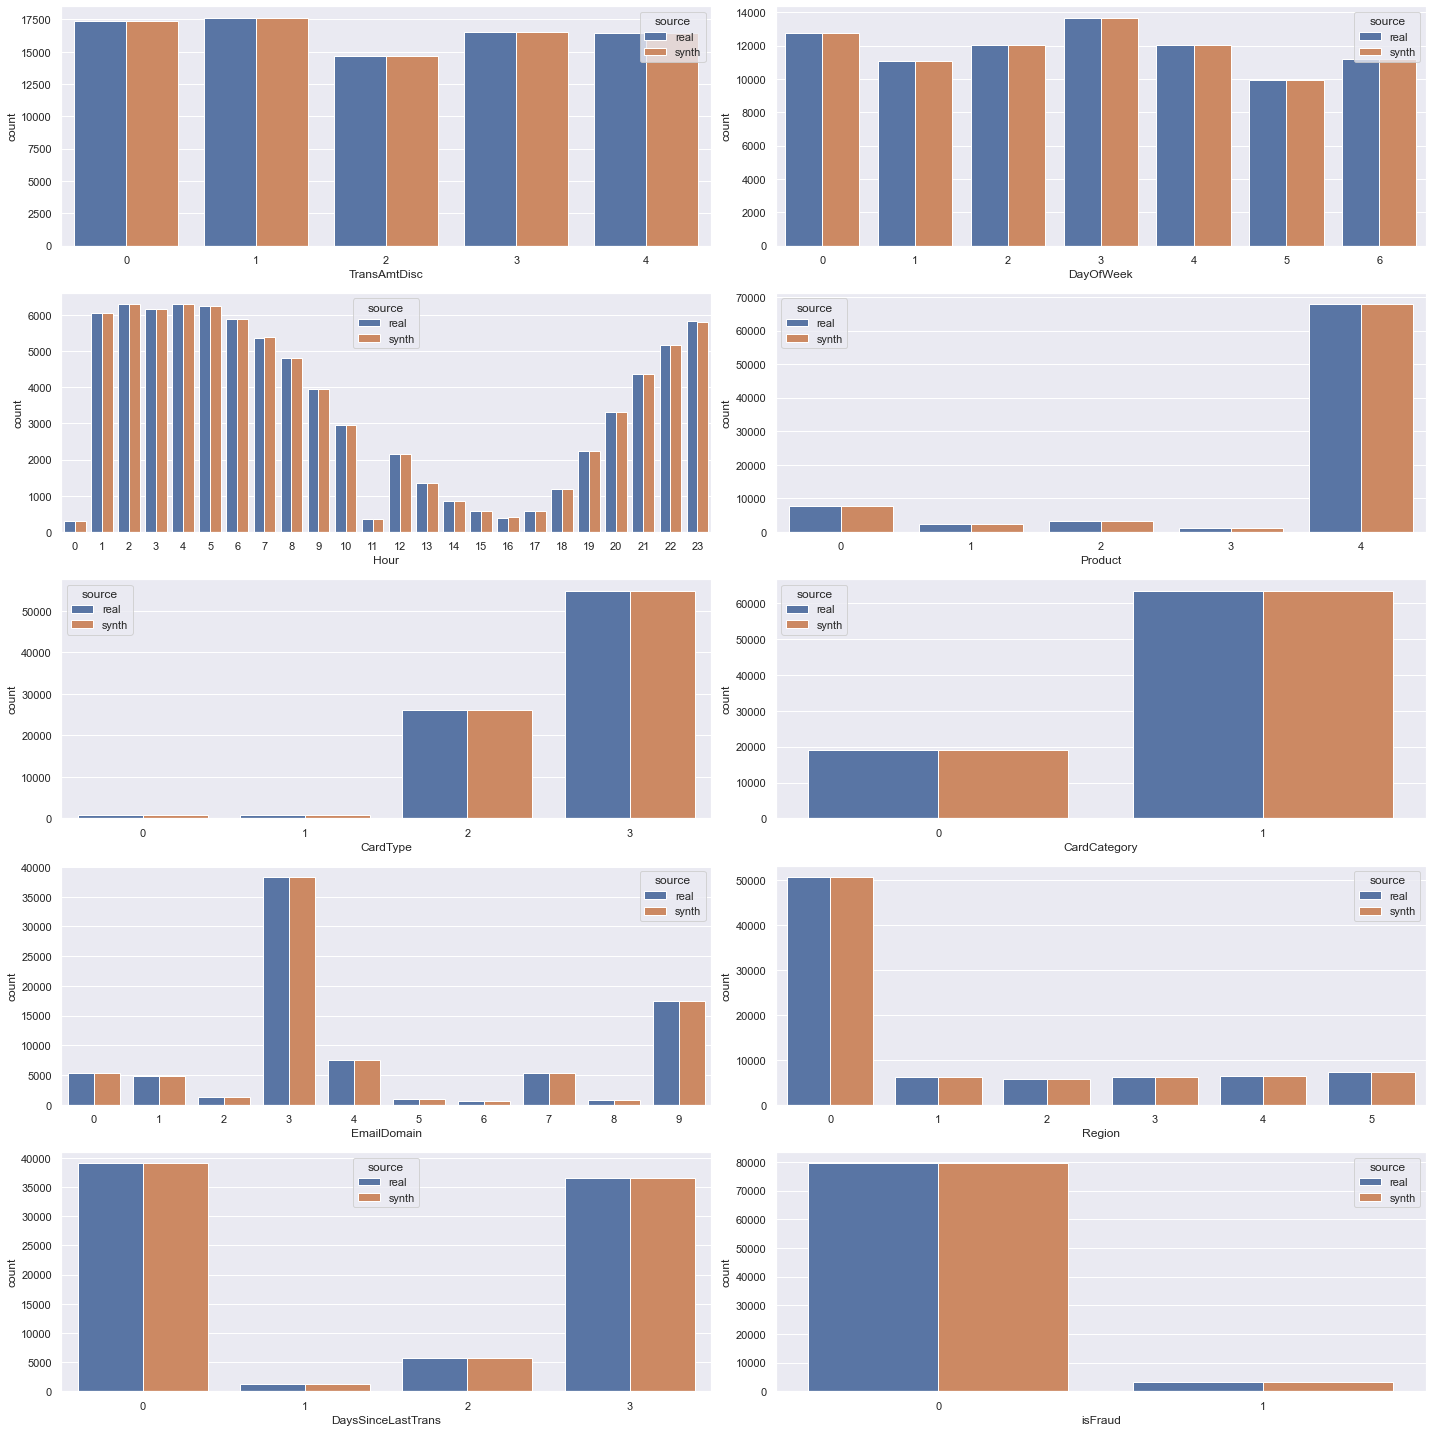

In [5]:
E.plot_histograms(figsize=(20,20), figcols = 2);

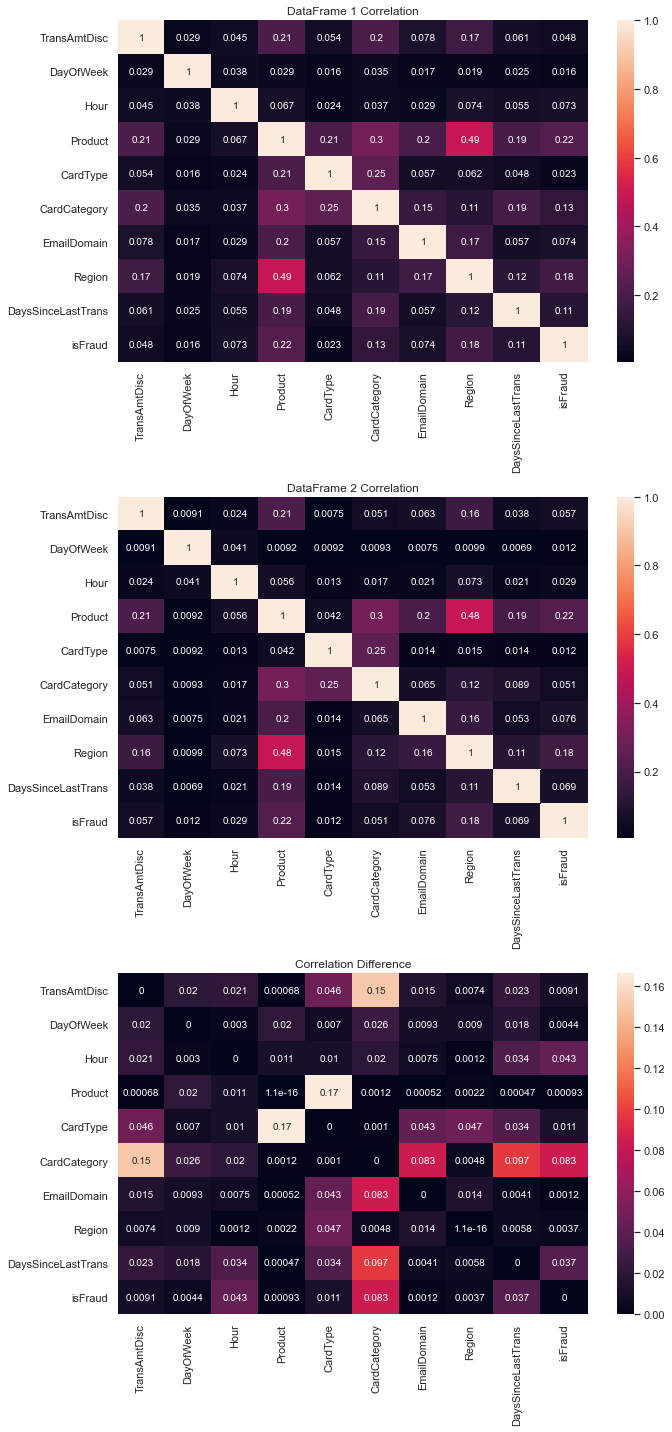

In [6]:
E.plot_correlation(feats=col_names, method='cramers_v', figsize=(10,20), annot=True, figcols = 1);

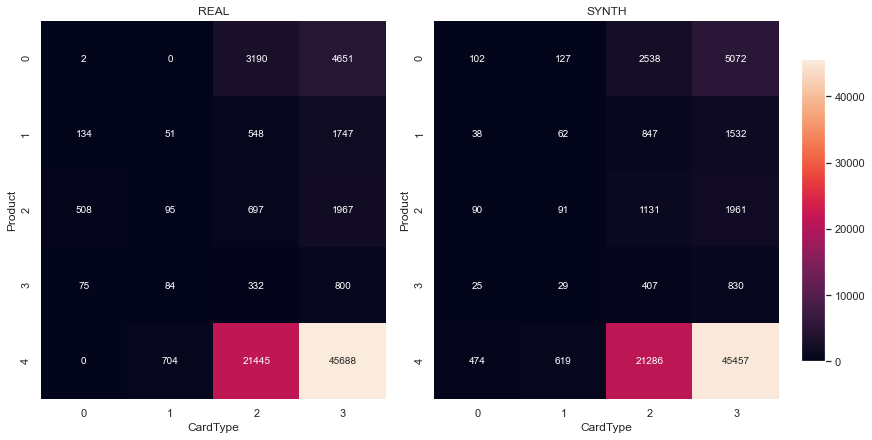

In [11]:
E.plot_crosstab('Product','CardType', figsize=(12, 6), annot=True, fmt='d');

In [8]:
#univariate distribution comparisons
for col in col_names:
    E.add_metric('jensen_shannon_distance','JS-distance: '+ col,feature=col, bins = None)

#correlations
E.add_metric('cramers_v_MSE')

#general utility
E.add_metric('propensity_metrics')

E.evaluate(as_df=True)

,value
JS-distance: TransAmtDisc,0.000101
JS-distance: DayOfWeek,0.000257
JS-distance: Hour,0.001479
JS-distance: Product,0.000143
JS-distance: CardType,0.000517
JS-distance: CardCategory,0.000101
JS-distance: EmailDomain,0.000479
JS-distance: Region,0.000226
JS-distance: DaysSinceLastTrans,0.000495
JS-distance: isFraud,0.000066


In [9]:
synth_data_baseline = pd.read_csv('baseline_data.csv')
for col in col_names:
    synth_data_baseline[col] = synth_data_baseline[col].astype('category',copy=False)

E_baseline = sg.Evaluator(real_data, synth_data_baseline)

In [10]:
E_baseline.copy_metrics(E)
E_baseline.evaluate(as_df=True)

,value
JS-distance: TransAmtDisc,0.000198
JS-distance: DayOfWeek,0.000248
JS-distance: Hour,0.002006
JS-distance: Product,0.000398
JS-distance: CardType,0.000949
JS-distance: CardCategory,0.000051
JS-distance: EmailDomain,0.000487
JS-distance: Region,0.000393
JS-distance: DaysSinceLastTrans,0.000496
JS-distance: isFraud,0.000022
